In [ ]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

In [2]:
(X_train,Y_train), (X_test,Y_test) = keras.datasets.mnist.load_data()
len(X_train), len(X_test)

(60000, 10000)

In [3]:
X_train[0].shape

(28, 28)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

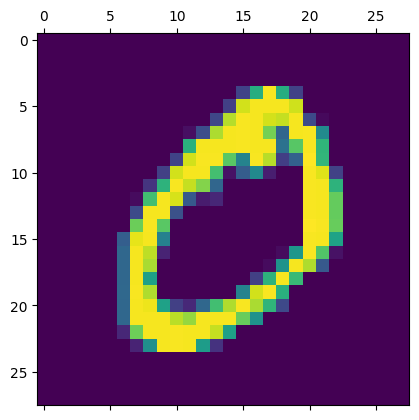

In [5]:
plt.matshow(X_train[1])

In [6]:
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,Y_train,epochs=5)

C:\Users\ARYAN BHAGAT\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8185 - loss: 0.7001
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9150 - loss: 0.3065
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9206 - loss: 0.2844
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9237 - loss: 0.2766
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9267 - loss: 0.2688


In [10]:
model.evaluate(X_test_flattened,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9129 - loss: 0.3070


[0.2702992558479309, 0.9240000247955322]

In [11]:
y_pred = model.predict(X_test_flattened)
y_pred[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([2.1729037e-02, 4.3511935e-07, 6.5428652e-02, 9.7137487e-01,
       3.1132558e-03, 1.3301685e-01, 1.7649844e-06, 9.9982202e-01,
       7.9496168e-02, 6.7005992e-01], dtype=float32)

In [12]:
np.argmax(y_pred[0])

7

In [13]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [14]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [15]:
tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   7,    8,  918,   23,    8,    5,   11,   11,   36,    5],
       [   2,    0,   12,  940,    1,   24,    2,    8,   11,   10],
       [   2,    1,    4,    2,  919,    0,    9,    3,    8,   34],
       [   7,    2,    3,   40,   10,  783,   11,    5,   25,    6],
       [  12,    3,    8,    2,    7,   22,  900,    2,    2,    0],
       [   1,    5,   20,   12,    6,    1,    0,  954,    2,   27],
       [   6,    7,    7,   39,    9,   43,    9,   13,  832,    9],
       [  11,    7,    1,   14,   28,    7,    0,   25,    1,  915]])>

<AxesSubplot:>

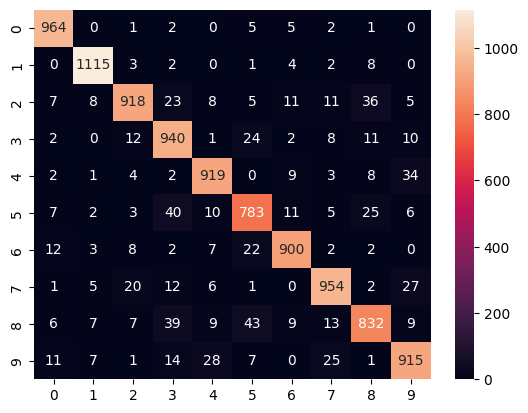

In [16]:
import seaborn as sns
sns.heatmap(tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels),annot=True,fmt='d')

In [17]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,Y_train,epochs=5)

C:\Users\ARYAN BHAGAT\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8797 - loss: 0.4367
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9612 - loss: 0.1261
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9759 - loss: 0.0813
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9813 - loss: 0.0602
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9854 - loss: 0.0474


In [18]:
model.evaluate(X_test_flattened,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9735 - loss: 0.0917


[0.0784202292561531, 0.9764999747276306]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


<AxesSubplot:>

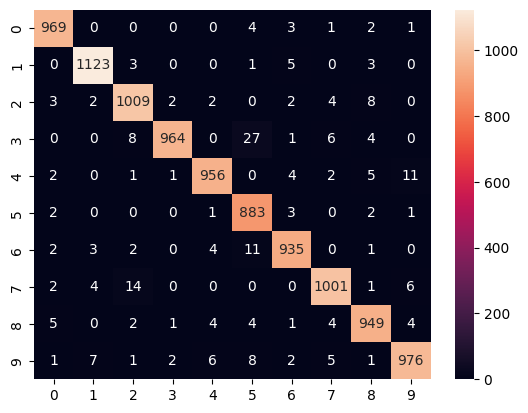

In [19]:
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]
tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels)
sns.heatmap(tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels),annot=True,fmt='d')

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=5)

C:\Users\ARYAN BHAGAT\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\ARYAN BHAGAT\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.8753 - loss: 0.4432
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9602 - loss: 0.1367
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9751 - loss: 0.0865
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9795 - loss: 0.0682
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9844 - loss: 0.0504
